In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
# loading Data set
df = sns.load_dataset('iris')

In [4]:
# dropping first column
df = df.iloc[:,1:]

In [5]:
# applying label emcoding on labels(target) columns
encoder = LabelEncoder()
df.species = encoder.fit_transform(df['species']) 

In [6]:
# Since we have three class in labels, we are dropping one to make it binary classes
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

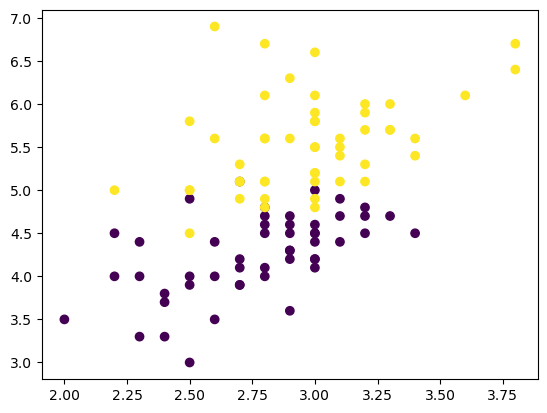

In [7]:
# plotting sepal widht and petal length 
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap=None)

In [8]:
# shuffing data 
df = df.sample(100)

In [9]:
# considering first 60 records are trainnig data 
df_train = df.iloc[:60,:].sample(10)

# considering next 20 record after 60  are validation
df_val = df.iloc[60:80,:].sample(5)

# considering next 20 record after 60  are testing data
df_test = df.iloc[80:,:].sample(5)

In [10]:
# validation data and labels from validation data 
X_val = df_val.iloc[:,0:2].values
y_val= df_val.iloc[:,-1].values

In [11]:
# train data labels from trian data 
X_train = df_train.iloc[:,0:2].values
y_train = df_train.iloc[:,-1].values

In [16]:
# test data and labels from test data 
X_test = df_test.iloc[:,0:2].values
y_test = df_test.iloc[:,-1].values

In [17]:
df_val.iloc[:,0:2]

,sepal_width,petal_length
81,2.4,3.7
132,2.8,5.6
105,3.0,6.6
53,2.3,4.0
68,2.2,4.5


# Case 1 - Bagging

In [18]:
# our model that predicts plot and shows accuracy 
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_val)
    print(accuracy_score(y_val,y_pred))
    

In [19]:
# Data for Tree 1 
# since we need to do shuffling every time for random selection of records in every tree

df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


In [20]:
# Creating our classifier
dt_bag1 = DecisionTreeClassifier()

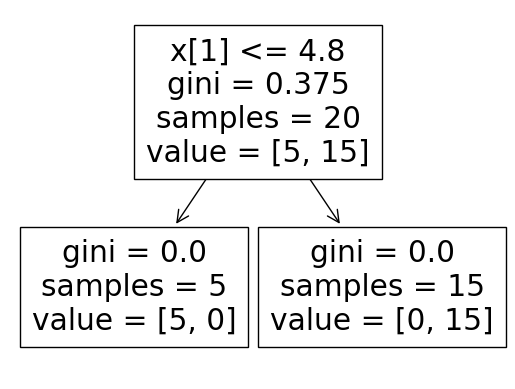

C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Arifa Mustafa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


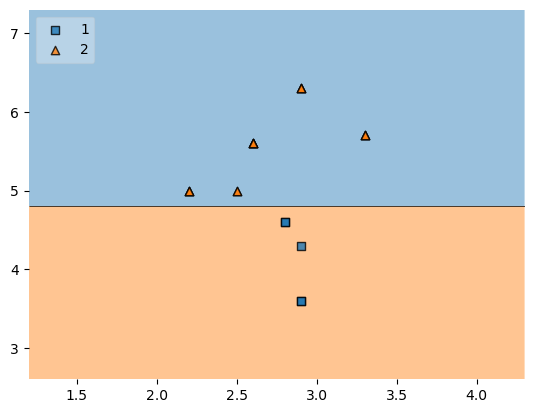

In [21]:
# runninig our model 
evaluate(dt_bag1,X,y)

In [22]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


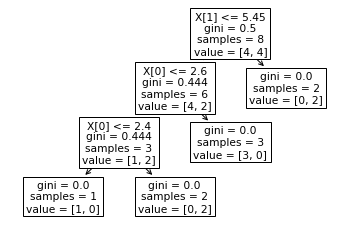

0.4


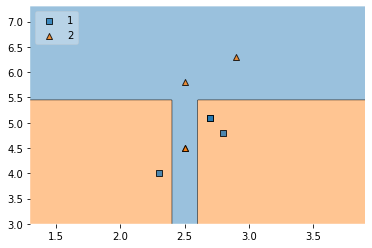

In [55]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [56]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]


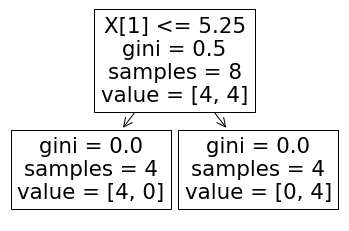

0.8


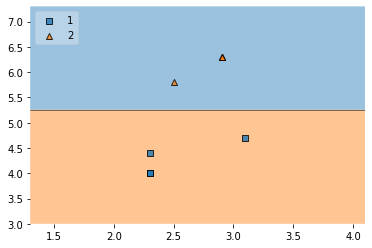

In [57]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [58]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

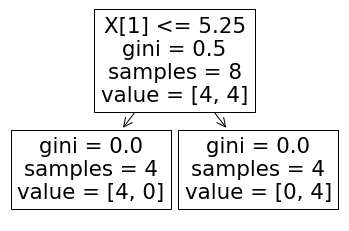

0.4


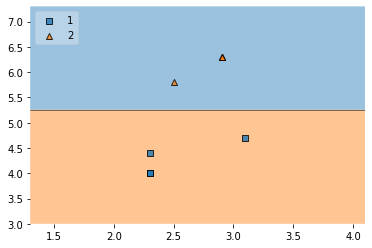

In [59]:
newclf = DecisionTreeClassifier()
evaluate(newclf,X,y)

In [60]:
import numpy as np

In [61]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


# Different sampling techniques can be used to sampling data 

### Pasting

In [62]:
# Method 1
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
53,2.3,4.0,1
82,2.7,3.9,1
83,2.7,5.1,1
107,2.9,6.3,2
76,2.8,4.8,1
86,3.1,4.7,1
87,2.3,4.4,1
102,3.0,5.9,2
106,2.5,4.5,2
108,2.5,5.8,2


In [63]:
df_train.sample(8)

,sepal_width,petal_length,species
86,3.1,4.7,1
102,3.0,5.9,2
76,2.8,4.8,1
87,2.3,4.4,1
107,2.9,6.3,2
82,2.7,3.9,1
108,2.5,5.8,2
53,2.3,4.0,1


### Random Subspaces

In [64]:
df1 = sns.load_dataset('iris')
df1 = df1.sample(10)

In [ ]:
df1.sample(2,replace=True,axis=1)

### Random Patches
- column sampling

In [ ]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)